<a href="https://colab.research.google.com/github/amulyaojha11/Temperature-Prediction-of-Indian-Cities/blob/main/Prediction/Mumbai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ARIMA and Seasonal ARIMA**

**Autoregressive Integrated Moving Averages**

The general process for ARIMA models is the following:



*   Visualize the Time Series Data
*   Make the time series data stationary
*   Plot the Correlation and AutoCorrelation Charts
*   Construct the ARIMA Model or Seasonal ARIMA based on the data
*   Use the model to make predictions




**Let's go through these steps!**

In [21]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
df=pd.read_csv('/content/Mumbai.csv')

In [23]:
df.head()

,Date,Temperature
0,2009-01-01,26.1
1,2009-02-01,26.6
2,2009-03-01,29.0
3,2009-04-01,30.5
4,2009-05-01,30.1


In [24]:
df.tail()

,Date,Temperature
122,2019-03-01,27.8
123,2019-04-01,29.9
124,2019-05-01,30.3
125,2019-06-01,30.0
126,2019-07-01,28.5


In [25]:
## Drop last 2 rows
df.drop(106,axis=0,inplace=True)

In [26]:
df.tail()

,Date,Temperature
122,2019-03-01,27.8
123,2019-04-01,29.9
124,2019-05-01,30.3
125,2019-06-01,30.0
126,2019-07-01,28.5


In [27]:
df.drop(105,axis=0,inplace=True)

In [28]:
df.tail()

,Date,Temperature
122,2019-03-01,27.8
123,2019-04-01,29.9
124,2019-05-01,30.3
125,2019-06-01,30.0
126,2019-07-01,28.5


In [29]:
# Convert Month into Datetime
df['Date']=pd.to_datetime(df['Date'])

In [30]:
df.head()

,Date,Temperature
0,2009-01-01,26.1
1,2009-02-01,26.6
2,2009-03-01,29.0
3,2009-04-01,30.5
4,2009-05-01,30.1


In [31]:
df.set_index('Date',inplace=True)

In [32]:
df.head()

,Temperature
Date,
2009-01-01,26.1
2009-02-01,26.6
2009-03-01,29.0
2009-04-01,30.5
2009-05-01,30.1


In [33]:
df.describe()

,Temperature
count,125.000000
mean,28.195200
std,1.634204
min,23.600000
25%,27.300000
50%,28.300000
75%,29.400000
max,31.200000


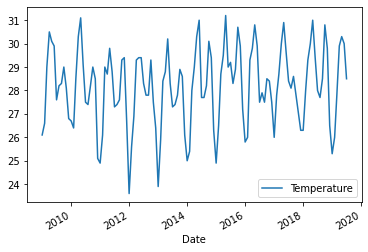

In [34]:
df.plot()

In [35]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [36]:
test_result=adfuller(df['Temperature'])

In [37]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Temperature):
    result=adfuller(Temperature)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [38]:
adfuller_test(df['Temperature'])

ADF Test Statistic : -1.554623259079144
p-value : 0.5063380109440624
#Lags Used : 11
Number of Observations Used : 113
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


##**Differencing**

In [39]:
df['Temperature First Difference'] = df['Temperature'] - df['Temperature'].shift(1)

In [40]:
df['Temperature'].shift(1)

Date
2009-01-01     NaN
2009-02-01    26.1
2009-03-01    26.6
2009-04-01    29.0
2009-05-01    30.5
              ... 
2019-03-01    26.0
2019-04-01    27.8
2019-05-01    29.9
2019-06-01    30.3
2019-07-01    30.0
Name: Temperature, Length: 125, dtype: float64

In [41]:
df['Seasonal First Difference']=df['Temperature']-df['Temperature'].shift(12)

In [42]:
df.head(14)

,Temperature,Temperature First Difference,Seasonal First Difference
Date,,,
2009-01-01,26.1,NaN,NaN
2009-02-01,26.6,0.5,NaN
2009-03-01,29.0,2.4,NaN
2009-04-01,30.5,1.5,NaN
2009-05-01,30.1,-0.4,NaN
2009-06-01,29.9,-0.2,NaN
2009-07-01,27.6,-2.3,NaN
2009-08-01,28.2,0.6,NaN
2009-09-01,28.3,0.1,NaN


In [43]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -2.566918301673897
p-value : 0.1000291380073528
#Lags Used : 13
Number of Observations Used : 99
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


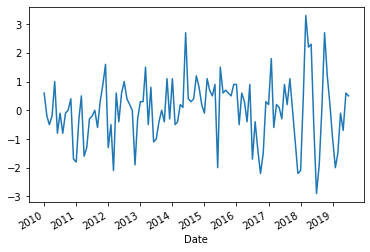

In [45]:
df['Seasonal First Difference'].plot()

##**Auto Regressive Model**

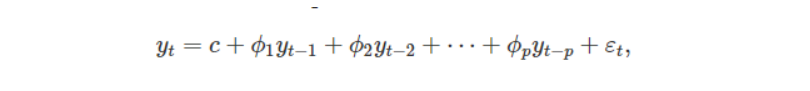

In [46]:
import pandas

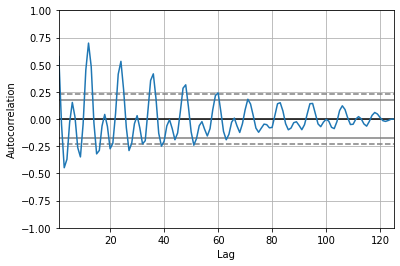

In [47]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Temperature'])
plt.show()

###**Final Thoughts on Autocorrelation and Partial Autocorrelation**



*   Identification of an AR model is often best done with the PACF.
*   For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
*   Identification of an MA model is often best done with the ACF rather than the PACF.

*   For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.
p,d,q p AR model lags d differencing q MA lags



In [48]:
import statsmodels as sm

In [49]:
import statsmodels.api as sm

In [50]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

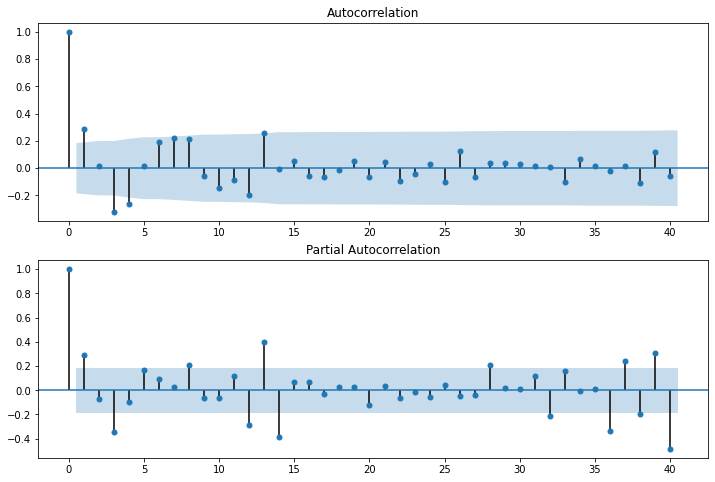

In [51]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [52]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

#**Train the model**

In [53]:
model=ARIMA(df['Temperature'],order=(2,1,2))
model_fit=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [54]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Temperature   No. Observations:                  124
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -191.516
Method:                       css-mle   S.D. of innovations              1.122
Date:                Thu, 18 Nov 2021   AIC                            395.032
Time:                        16:43:28   BIC                            411.954
Sample:                             1   HQIC                           401.906
                                                                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0188      0.101      0.186      0.853      -0.180       0.217
ar.L1.D.Temperature     0.9722      0.022     43.821      0.000       0.929       1.016
ar.L2.D.Temperature    -0.9832      0.016    -62.093      0.000      -1.014      -0.952
ma.L1.D.Temperature    -0.8314      0.057    -14.590      0.000      -0.943      -0.720
ma.L2.D.Temperature     0.8460      0.080     10.592      0.000       0.689       1.003
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.4944           -0.8790j            1.0085           -0.1685
AR.2            0.4944           +0.8790j            1.0085            0.1685
MA.1            0.4913           -0.9698j            1.0872           -0.1754
MA.2            0.4913           +0.9698j            1.0872            0.1754
-----------------------------------------------------------------------------
"""

In [77]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)

In [78]:
import statsmodels.api as sm

In [79]:
model=sm.tsa.statespace.SARIMAX(df['Temperature'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [80]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [81]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [82]:
future_datest_df.tail()

,Temperature,Temperature First Difference,Seasonal First Difference,forecast
2021-02-01,NaN,NaN,NaN,NaN
2021-03-01,NaN,NaN,NaN,NaN
2021-04-01,NaN,NaN,NaN,NaN
2021-05-01,NaN,NaN,NaN,NaN
2021-06-01,NaN,NaN,NaN,NaN


#**Test the model**

In [83]:
future_df=pd.concat([df,future_datest_df])

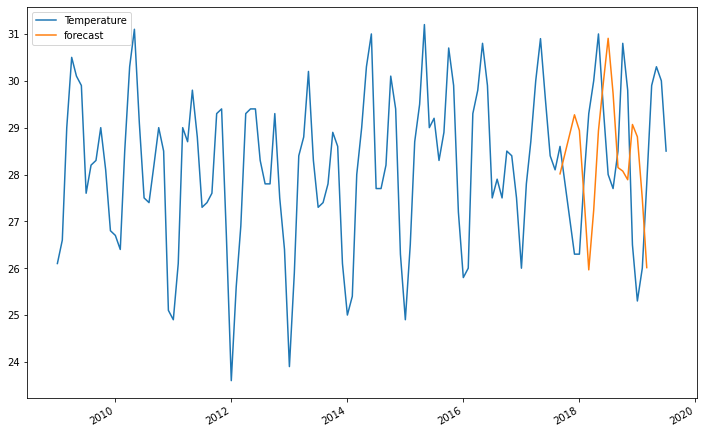

In [84]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Temperature', 'forecast']].plot(figsize=(12, 8)) 

In [85]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [86]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [87]:
future_df=pd.concat([df,future_datest_df])

In [88]:
future_datest_df.tail()

,Temperature,Temperature First Difference,Seasonal First Difference,forecast
2021-02-01,NaN,NaN,NaN,NaN
2021-03-01,NaN,NaN,NaN,NaN
2021-04-01,NaN,NaN,NaN,NaN
2021-05-01,NaN,NaN,NaN,NaN
2021-06-01,NaN,NaN,NaN,NaN


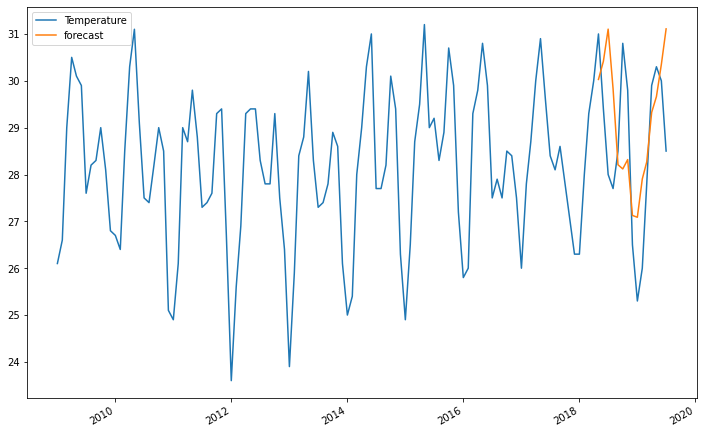

In [102]:
future_df['forecast'] = results.predict(start = 110, end = 124, dynamic= True)  
future_df[['Temperature', 'forecast']].plot(figsize=(12, 8))